In [1]:
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
from specim.specfuncs import spec1d
import glob
from keckcode.deimos import deimosmask1d

In [2]:
infile = 'J0248_r0038_clean.fits'

In [3]:
spec = spec2d.Spec2d(infile, hext=1, xtrim=[20, 125])      #, hext=12, xtrim=[30, 500])


Loading file J0248_r0038_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0248_r0038_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 20:126.  yrange: 0:4096
Final data dimensions (x y): 106 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 106



In [4]:
spec.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




Dispersion : 0.800000
Found 107 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


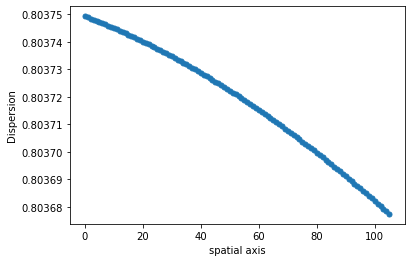

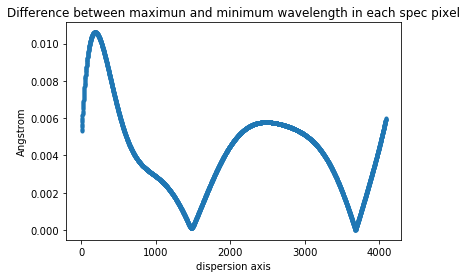

In [5]:
spec.do_waverect(doplot=True)

Profile max value (before normalization) 423.731445


<IPython.core.display.Javascript object>


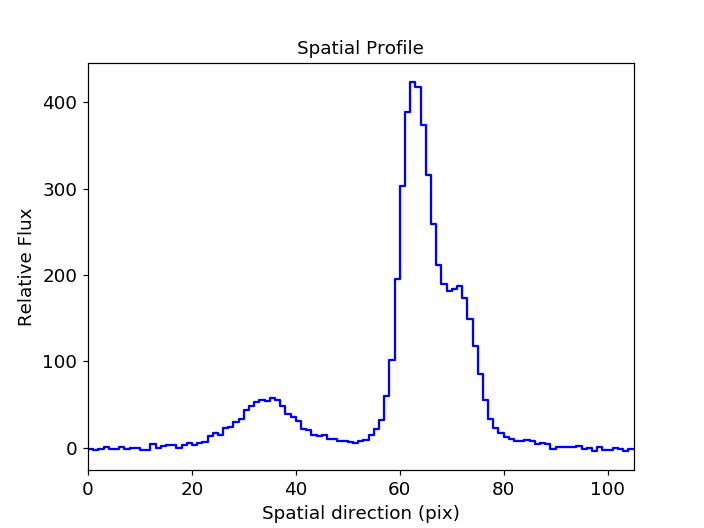

In [6]:
%matplotlib notebook
profile = spec.spatial_profile(pixrange=[1100, 1200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 4
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 65, 36, 3

amplitude=65.000000, mu=36.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 200, 63, 2

amplitude=200.000000, mu=63.000000, sigma=2.000000

Parameters of Gaussian profile 3 : 350, 68, 2

amplitude=350.000000, mu=68.000000, sigma=2.000000

Parameters of Gaussian profile 4 : 180, 73, 2

amplitude=180.000000, mu=73.000000, sigma=2.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Polynomial1D(0, c0=2.303192

<IPython.core.display.Javascript object>


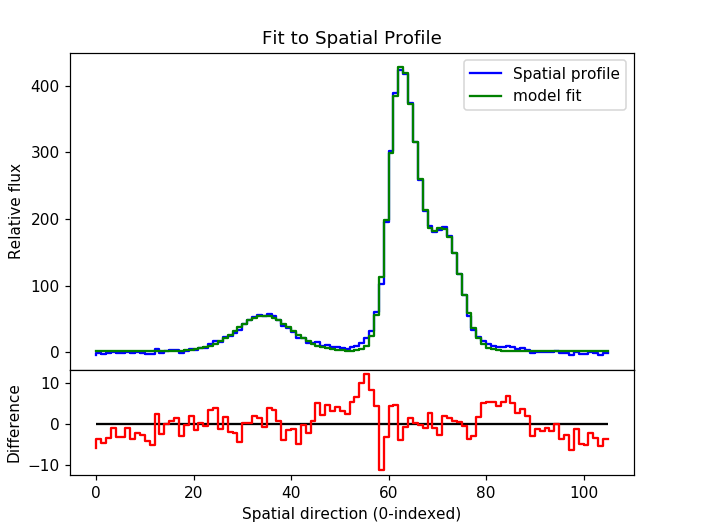

<IPython.core.display.Javascript object>


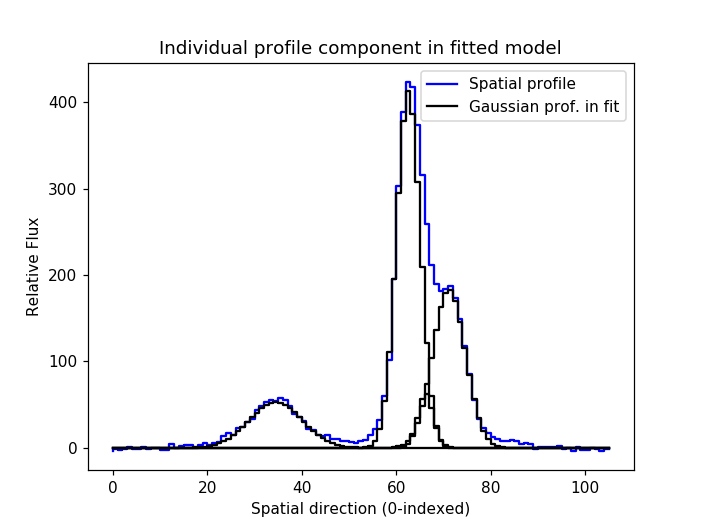


Do you want to start over ? : type yes/no
no


In [50]:
mod1 = spec.initial_model()

In [51]:
def tie_pos1_gauss(model):
    return model.mean_2 - 3.02     #28.43

def tie_pos1_moffat(model):
     return model.x_0_6 -  31.117
            
def tie_pos2_gauss(model):
     return model.mean_2 + 6.31         # 32.289
    
def tie_pos2_moffat(model):
    return model.x_0_6 - 3.29

def tie_pos3_moffat(model):
    return model.x_0_6 -  1.0

def tie_pos3_gauss(model):
     return model.mean_4 - 8.61
    
def tie_pos4_moffat(model):
    return model.x_0_6  + 7.8

def tie_pos4_gauss(model):
     return model.mean_1 + 36.76
    

# for two Gaussian and one Moffat  
#mod1[2].mean.tied = tie_pos1_moffat 
#mod1[3].mean.tied = tie_pos2_moffat 
#mod1[4].mean.tied = tie_pos3_moffat

#mod1[4].stddev = 3.0
#mod1[4].stddev.fixed = True

# for two Gaussian profile
#mod1[2].mean.tied = tie_pos1_gauss 
mod1[2].mean.tied = tie_pos3_gauss 
#mod1[4].mean.tied = tie_pos4_gauss 
#mod1[4].mean.tied = tie_pos4_gauss 

def tie_std1(model):
    return model.stddev_4 

def tie_amp1(model):
    return model.amplitude_4 *.8

#mod1[2].amplitude.tied = tie_amp1
#mod1[2].stddev.tied = tie_std1 
# for two Moffat profile
#mod1[3].x_0.tied = tie_pos1_gauss
#mod1[4].x_0.tied = tie_pos2_gauss


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Polynomial1D(0, c0=2.30319262)>

    [1]: <Gaussian1D(amplitude=52.67368397, mean=35.01997501, stddev=5.62048177)>

    [2]: <Gaussian1D(amplitude=413.69421626, mean=63.06857456, stddev=2.50936745)>

    [3]: <Gaussian1D(amplitude=62.80107339, mean=66.75902508, stddev=1.59607323)>

    [4]: <Gaussian1D(amplitude=183.09179837, mean=71.6700551, stddev=3.46762615)>
Parameters:
           c0_0           amplitude_1    ...       mean_4           stddev_4    
    ------------------ ----------------- ... ----------------- -----------------
    2.3031926195165147 52.67368397408947 ... 71.67005510272209 3.467626149005482

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4]
Components: 
    [0]: <Polynomial1

<IPython.core.display.Javascript object>


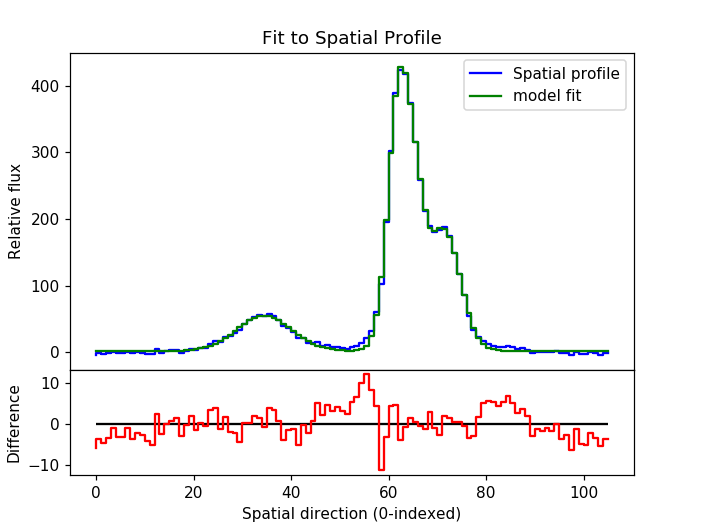

<IPython.core.display.Javascript object>


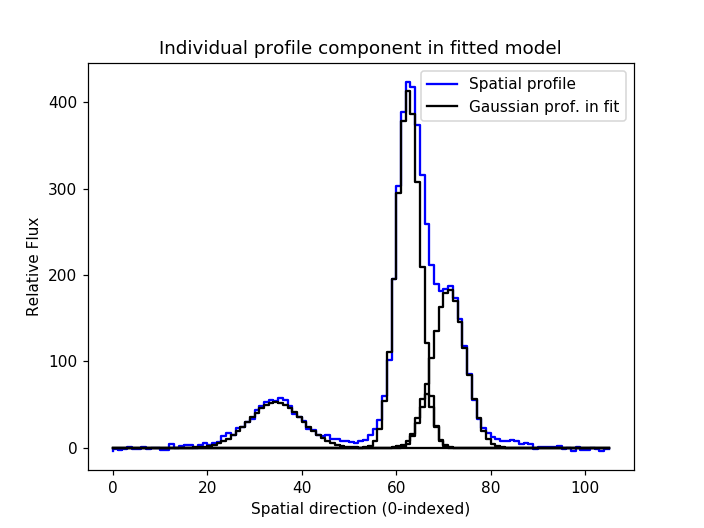

In [52]:
mod_new =spec.refined_model(mod1)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 2 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 2 to parameter: mean_2
Fitting polynomial of degree 2 to parameter: stddev_2
Fitting polynomial of degree 2 to parameter: mean_3
Fitting polynomial of degree 2 to parameter: stddev_3
Fitting polynomial of degree 2 to parameter: mean_4
Fitting polynomial of degree 2 to parameter: stddev_4


<IPython.core.display.Javascript object>


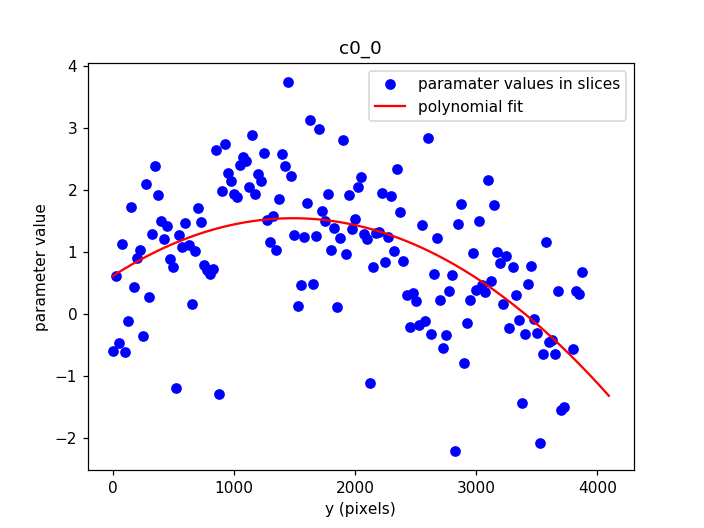

<IPython.core.display.Javascript object>


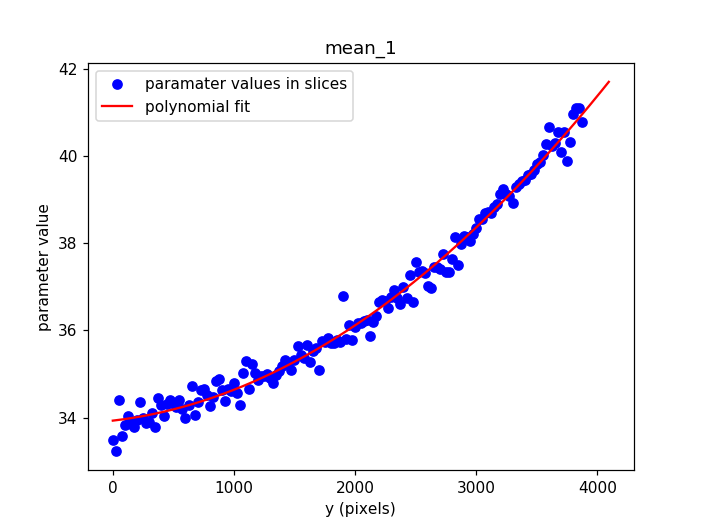

<IPython.core.display.Javascript object>


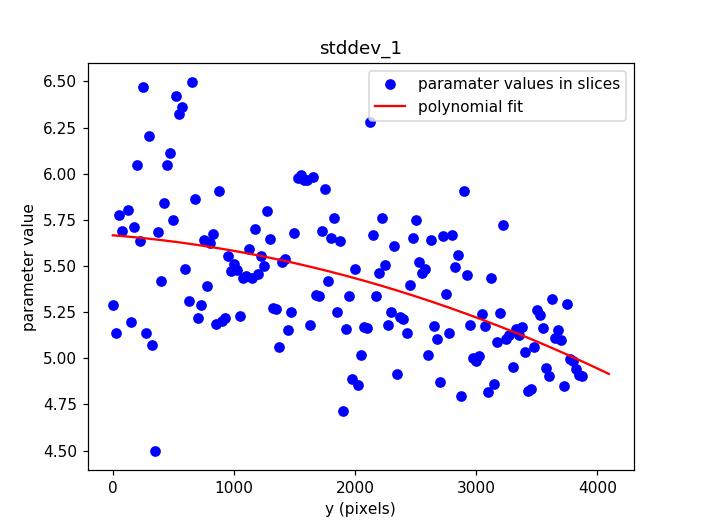

<IPython.core.display.Javascript object>


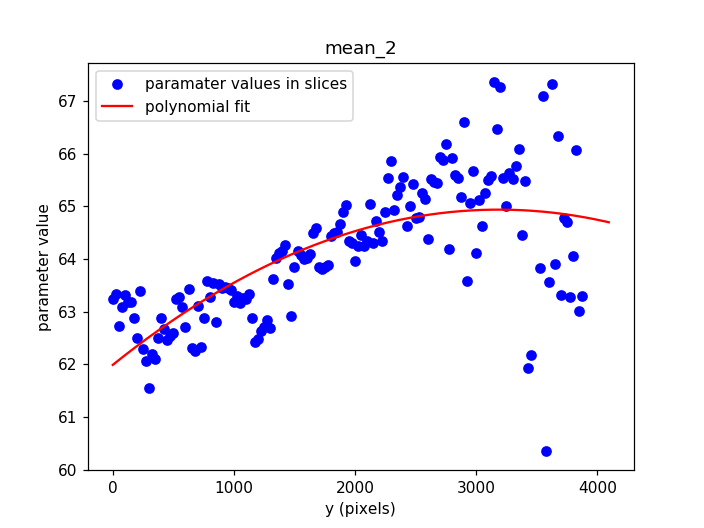

<IPython.core.display.Javascript object>


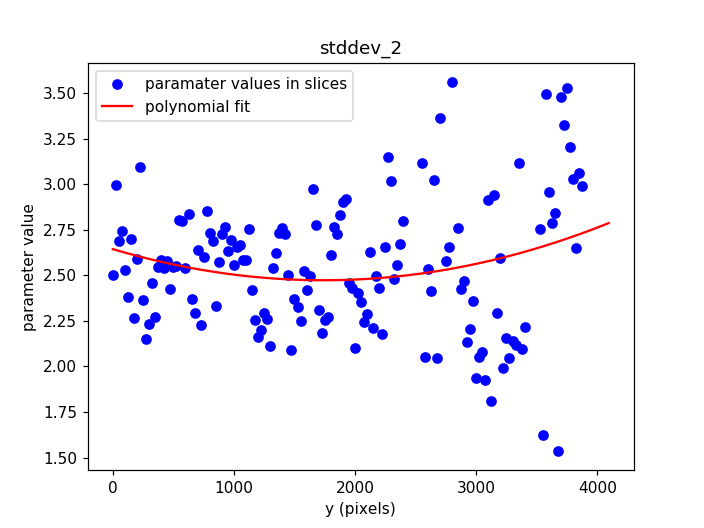

<IPython.core.display.Javascript object>


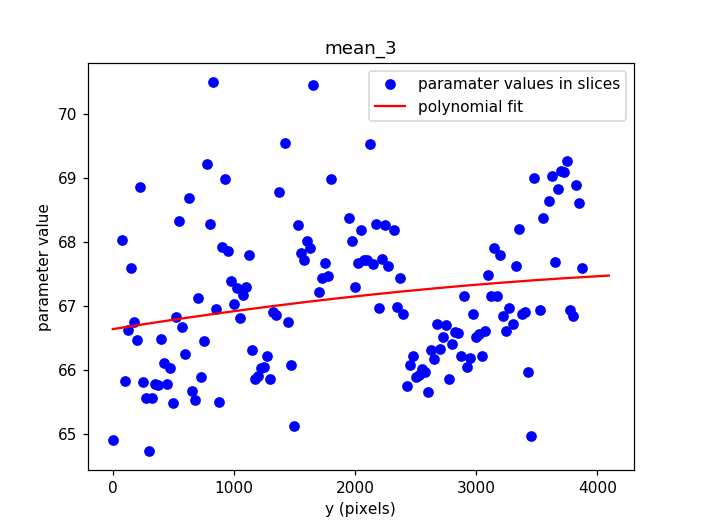

<IPython.core.display.Javascript object>


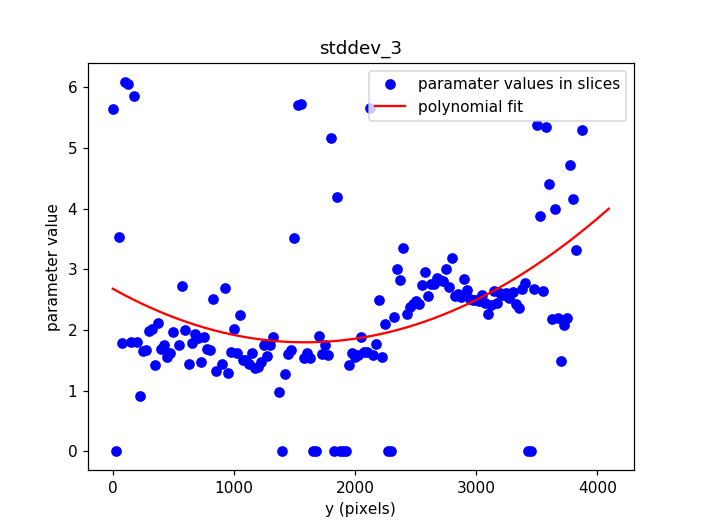

<IPython.core.display.Javascript object>


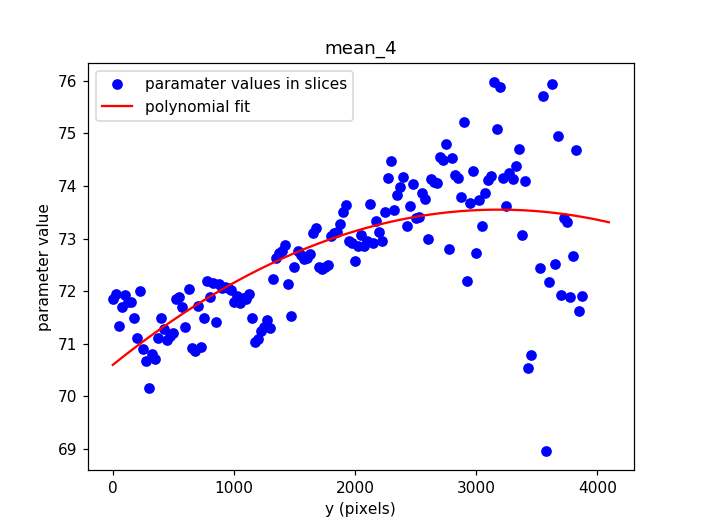

<IPython.core.display.Javascript object>


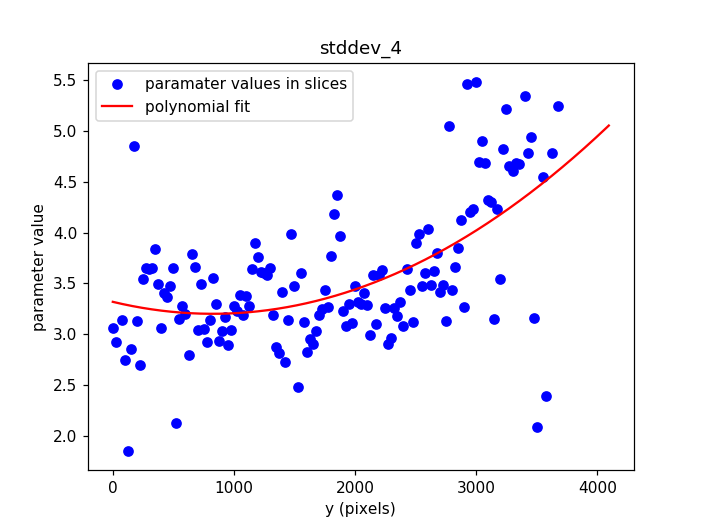

In [55]:
spec.find_and_trace(mod_new, stepsize=25, fitorder={'stddev_4':2, 'mean_4':2, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[0,3900], polyorder=2)

Fitting to 4 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


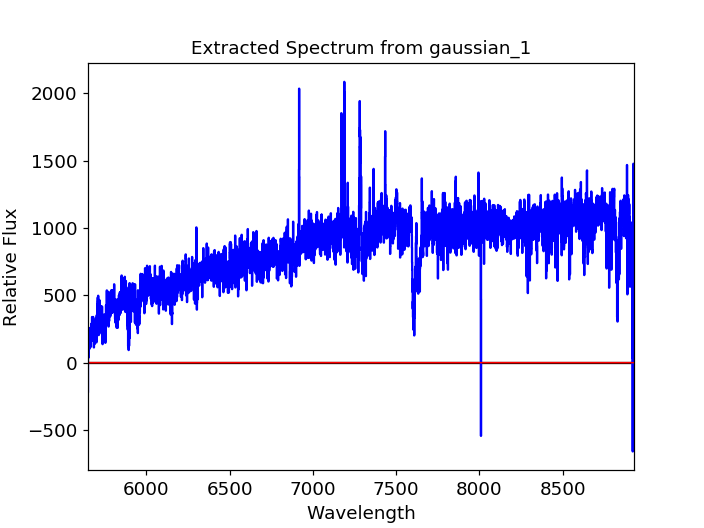

<IPython.core.display.Javascript object>


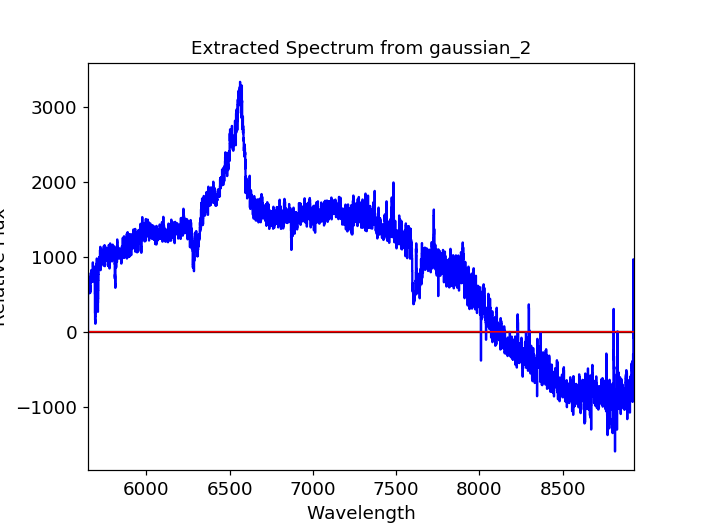

<IPython.core.display.Javascript object>


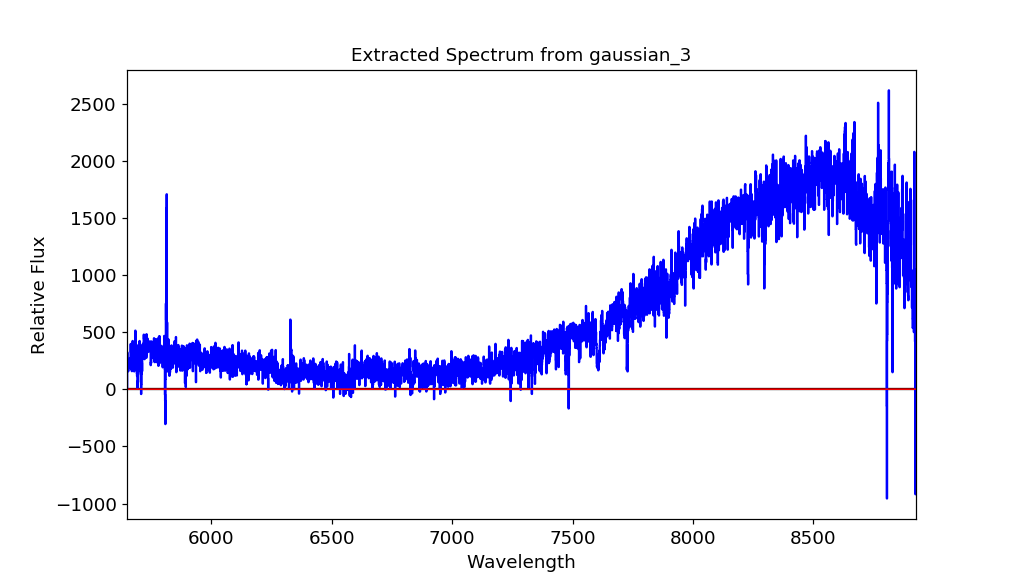

<IPython.core.display.Javascript object>


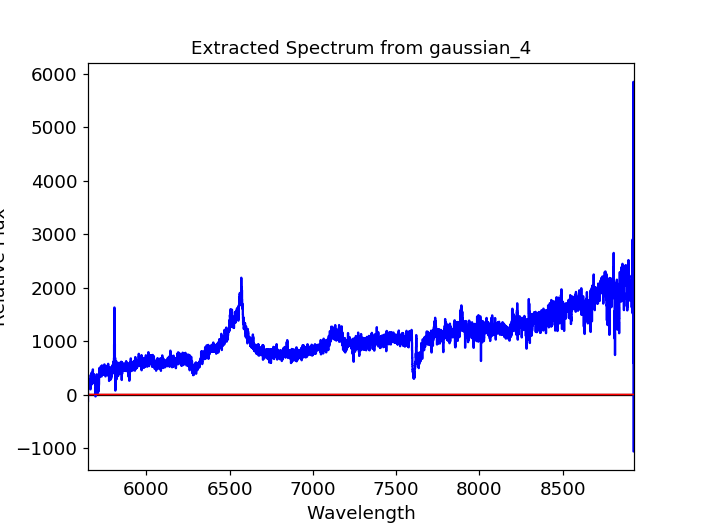

In [56]:
spec.extract(method='modelfit')

In [70]:
wav = spec.spectra[2][1]['wav']
flux = spec.spectra[2][1]['flux']

In [ ]:
flux1 = spec.spectra[1][1]['flux']

In [71]:
spec1 = spec1d.Spec1d(wav=wav[0:3500], flux=flux[0:3500])

 Spectrum Start:  5649.82
 Spectrum End:     8449.01
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


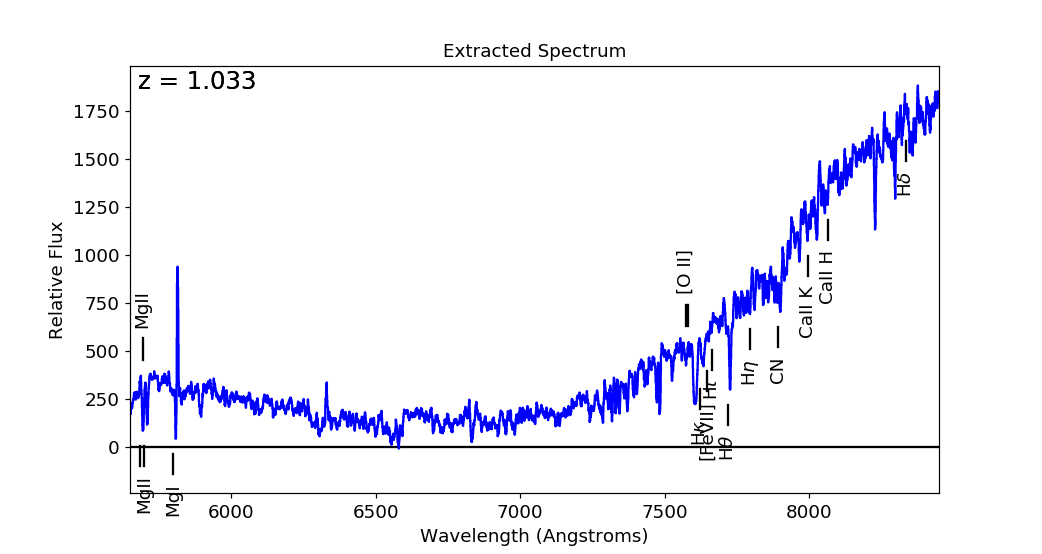


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg II         2795.53       5683.31
Mg II         2802.71       5697.91
Mg I          2852.00       5798.12
H-kappa       3750.00       7623.75
[Fe VII]      3761.40       7646.93
H-iota        3770.00       7664.41
H-theta       3797.00       7719.30
H-eta         3835.00       7796.55
CN bandhd     3883.00       7894.14
CaII K        3933.67       7997.15
CaII H        3968.47       8067.90
H-delta       4101.00       8337.33


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg II         2799.80       5691.99
[O II]        3726.03       7575.02
[O II]        3728.82       7580.69



In [75]:
spec1.smooth(7)
spec1.mark_lines('abs', z=1.033, usesmooth=True)
spec1.mark_lines('strongem', z=1.033, usesmooth=True)

<IPython.core.display.Javascript object>


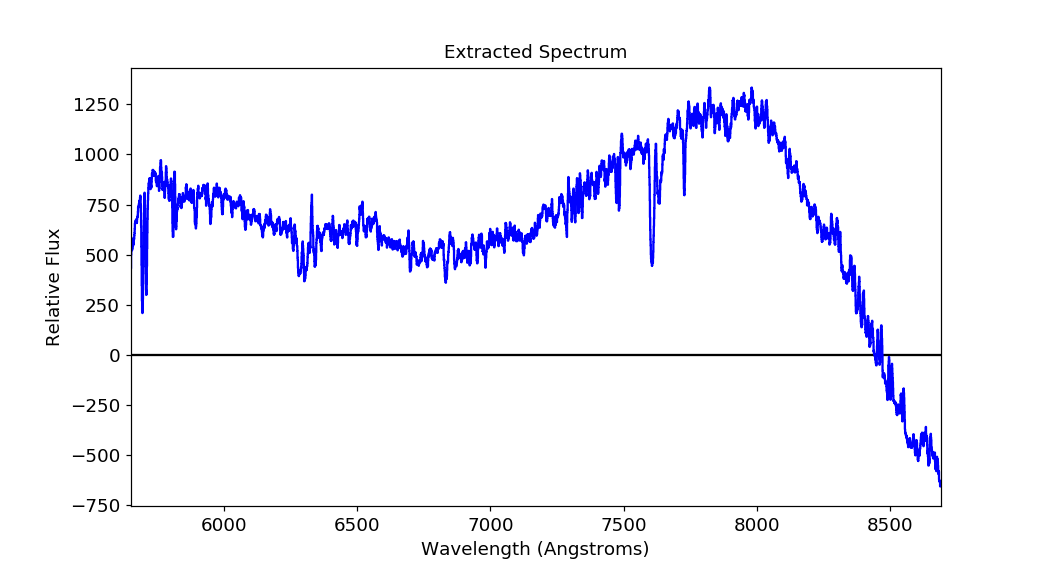

In [30]:
spec1.smooth(7)

Fitting to 4 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.82
 Spectrum End:     8925.82
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


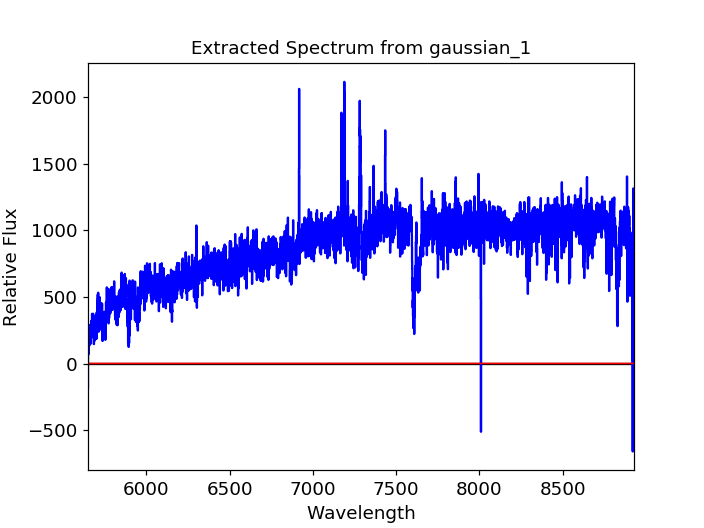

<IPython.core.display.Javascript object>


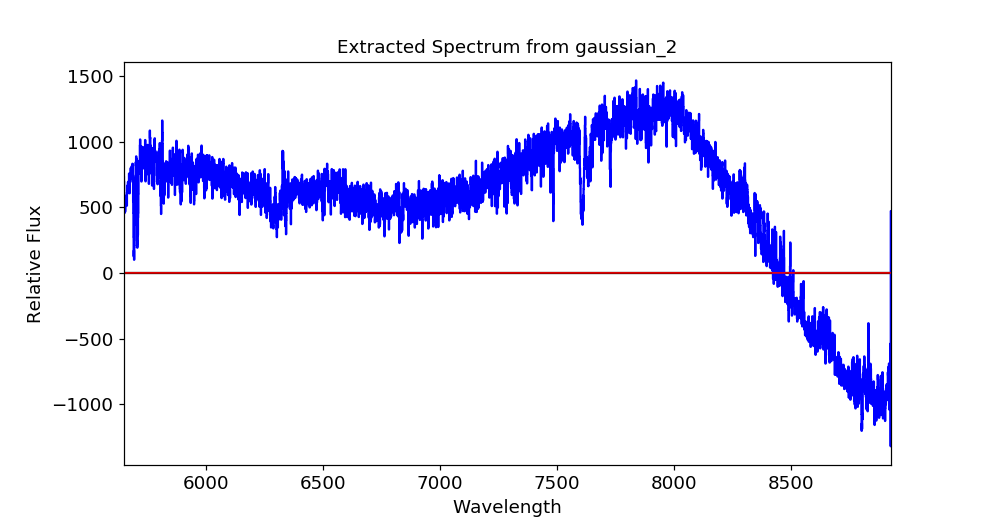

<IPython.core.display.Javascript object>


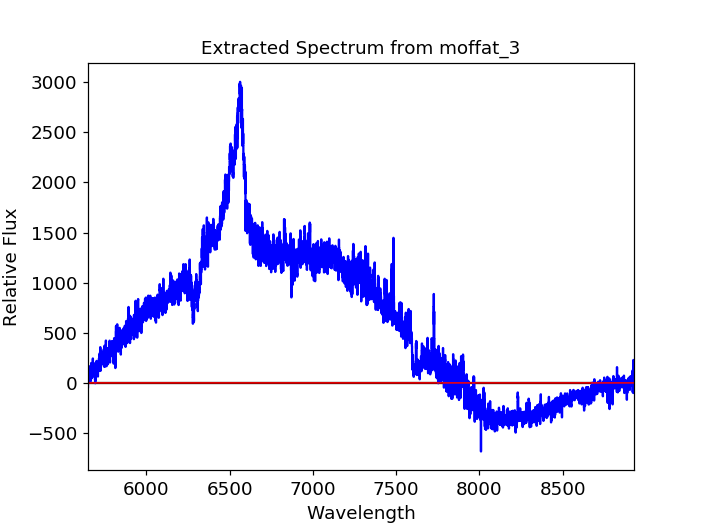

<IPython.core.display.Javascript object>


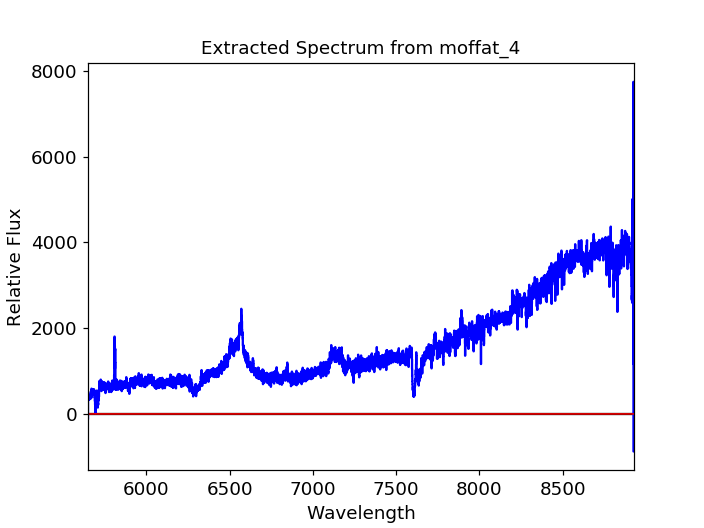

In [25]:
spec.extract(method='modelfit')

In [63]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [64]:
spec1 = spec1d.Spec1d(wav=wav[0:4000], flux=flux[0:4000])

 Spectrum Start:  5649.82
 Spectrum End:     8849.02
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


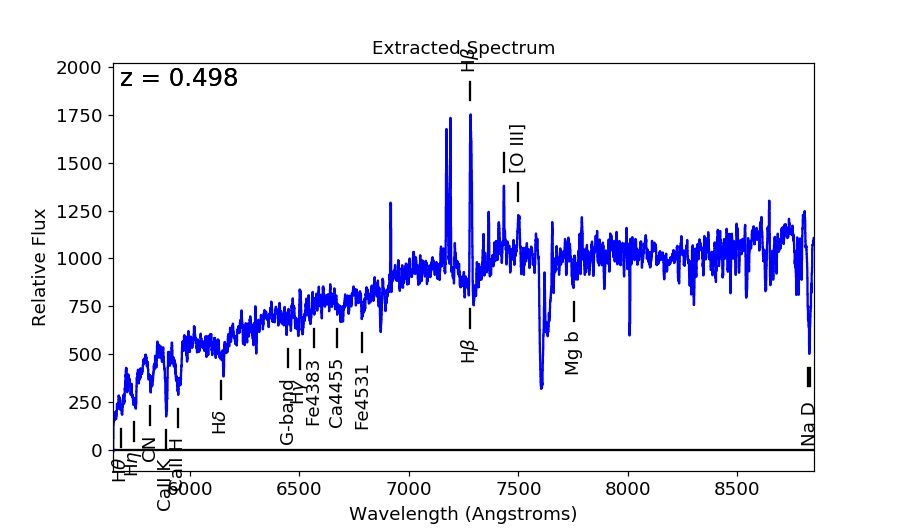


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-theta       3797.00       5687.91
H-eta         3835.00       5744.83
CN bandhd     3883.00       5816.73
CaII K        3933.67       5892.64
CaII H        3968.47       5944.77
H-delta       4101.00       6143.30
G-band        4305.00       6448.89
H-gamma       4340.00       6501.32
Fe4383        4383.00       6565.73
Ca4455        4455.00       6673.59
Fe4531        4531.00       6787.44
H-beta        4861.00       7281.78
Mg I (b)      5176.00       7753.65
Na I (D)      5889.95       8823.15
Na I (D)      5895.92       8832.09


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       7281.78
[O III]       4962.00       7433.08
[O III]       5007.00       7500.49



In [65]:
spec1.smooth(5)
spec1.mark_lines('abs', z=0.498, usesmooth=True)
spec1.mark_lines('strongem', z=0.498, usesmooth=True)

In [ ]:
wav = spec.spectra[0][1]['wav']
flux = spec.spectra[0][1]['flux']

In [ ]:
spec1 = spec1d.Spec1d(wav=wav[0:4080], flux=flux[0:4080])

In [ ]:
spec1.smooth(9)
spec1.mark_lines('abs', z=0.498, usesmooth=True)
spec1.mark_lines('strongem', z=0.498, usesmooth=True)